# TME sur les données blablacar

**Ce fichier est le fichier de travail**, l'autre fichier blablacar est donné pour information et pour montrer comment les données ont été collectées.

In [14]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
import pickle as pkl
from scipy.stats import mode

## Chargement des données

Les données sont stockées au format pickle (code fourni ci-dessous):

1. Importer le module : import `pickle as pkl`
1. Charger les données avec `load`
1. La structure est un dictionnaire, les données sont dans le champ `data`
1. La description des colonnes est dans `indexcol`

In [2]:
# chargement des données
fich = pkl.load( open('donnees_blablacar.pkl', 'rb'))

# {'indexcol': cols , 'data':pp2db, 'villes': villes, 'marques':marques }
titles_col = fich['indexcol']
print(len(titles_col), titles_col) 
data = fich['data']
print(data.shape)
dico_villes = fich['villes']
dico_marques = fich['marques']
print(dico_marques)

14 ['annee', 'mois', 'jour', 'heure', 'dep_ville', 'arr_ville', 'dep_coord_x', 'dep_coord_y', 'arr_coord_x', 'arr_coord_y', 'prix', 'marque', 'stars_confort', 'distance']
(6428, 14)
{'FORD': 6, 'BMW': 12, 'ISUZU': 32, 'OPEL': 1, 'LAND ROVER': 28, 'LIDER': 33, 'DS': 2, 'AUDI': 49, 'DACIA': 45, 'JAGUAR': 39, 'TOYOTA': 13, 'SUZUKI': 20, 'HUNDAI': 42, 'CITROEN': 17, 'IVECO': 8, 'RENAULT': 15, 'SKODA': 27, 'ROVER': 19, 'MITSUBISHI': 5, 'MERCEDES-BENZ': 35, 'DODGE': 29, 'ALFA ROMEO': 37, 'CHEVROLET': 26, 'LANCIA': 10, 'INFINITI': 36, 'DAEWOO': 30, 'MIETWAGEN': 38, 'VOLKSWAGEN': 3, 'LADA': 0, 'GOLF': 4, 'PORSCHE': 23, 'NISSAN': 40, 'unknown': 43, 'SSANGYONG': 34, 'FIAT': 50, 'SAAB': 14, 'CHRYSLER': 51, 'JEEP': 9, 'TESLA': 47, 'PEUGEOT': 25, 'MERCEDES BENZ': 48, 'MAZDA': 31, 'HONDA': 53, 'RANGE ROVER': 11, 'SMART': 24, 'KIA': 52, 'VOLVO': 46, 'LEXUS': 44, 'SUBARU': 18, 'SEAT': 16, 'MINI': 7, 'SUV LEXUS': 21, 'MERCEDES': 41, 'HYUNDAI': 22}


## Discrétisation et histogramme

Nous nous intéressons à la variable `distance` (dernière colonne). Nous allons procéder de la manière suivante:
1. Analyse rapide de la variable aléatoire: calcul de la moyenne et de l'écart-type
1. Analyse plus fine (1): affichage des 10 quantiles
1. Analyse plus fine (2): discrétisation de la variable en 10 intervalles de largeur constante & comptage des effectifs dans chaque catégorie (= construction d'un histogramme)
 - Construire l'histogramme à la main. (1) calculer les bornes des intervalles puis (2) utiliser `np.where` pour déterminer les effectifs dans chaque classe. Utiliser `plt.bar` pour l'affichage.
 - Vérifier vos résultats avec `np.histogram` et `plt.hist` pour l'affichage
 - Comparer les quantiles et les bornes des intervalles discrets
1. Discuter le nombre d'intervalles pour l'histogramme et trouver une valeur satisfaisante

**Notes** : 
- dans `np.where`, il faut mettre des parenthèses s'il y a plusieurs clause

> `np.where((x>a) & (x<b))` : tous les indices de x qui satisfont la clause
>
> `np.where((x>a) & (x<b), 1, 0).sum()` : le comptage associé

- Dans `plt.bar`, il faut donner une largeur importante aux bar, sinon on ne voit rien

In [3]:
# Analyse rapide : moyenne, écart-type, calcul des quantiles pour faire la synthèse de cette variable aléatoire

d = data[:,-1] # extraction de la variable distance
d_unique = np.unique(d, return_counts=True) # les elements uniques de d
d_distr = d_unique[1] / d_unique[1].sum()
d_mean = d.sum() / d.size # d.mean()
d_std = np.sqrt(((d - d_mean) ** 2).mean()) # d.std()
quantiles_num = 10
quantile_lvls = np.linspace(0, 1, quantiles_num)
d_quantiles = np.quantile(d, quantile_lvls)

print(d_mean)
print(d_std)
print(d_quantiles)

# A vous de jouer pour calculer tous les descripteurs = recherche dans la doc numpy !

d_median = np.median(d)
d_mode = mode(d)

print(d_median)
print(d_mode)


254.74066583696327
210.07021031617558
[   6.           67.           95.          120.          159.
  210.          288.66666667  385.          530.88888889 2254.        ]
182.0
ModeResult(mode=array([97.]), count=array([50]))


In [4]:
# Discrétisation des distances & histogramme avec np.histogram

intervals_num = 10

d_hist = np.histogram(d, intervals_num)
print(d_hist)



(array([3861, 1465,  805,  213,   65,   13,    2,    3,    0,    1]), array([   6. ,  230.8,  455.6,  680.4,  905.2, 1130. , 1354.8, 1579.6,
       1804.4, 2029.2, 2254. ]))


(array([1131, 1665, 1065,  550,  560,  355,  387,  278,  140,   87,   85,
         41,   31,   26,    8,    7,    4,    2,    1,    0,    1,    1,
          1,    1,    0,    0,    0,    0,    0,    1]), array([[   6.        ,   80.93333333],
       [  80.93333333,  155.86666667],
       [ 155.86666667,  230.8       ],
       [ 230.8       ,  305.73333333],
       [ 305.73333333,  380.66666667],
       [ 380.66666667,  455.6       ],
       [ 455.6       ,  530.53333333],
       [ 530.53333333,  605.46666667],
       [ 605.46666667,  680.4       ],
       [ 680.4       ,  755.33333333],
       [ 755.33333333,  830.26666667],
       [ 830.26666667,  905.2       ],
       [ 905.2       ,  980.13333333],
       [ 980.13333333, 1055.06666667],
       [1055.06666667, 1130.        ],
       [1130.        , 1204.93333333],
       [1204.93333333, 1279.86666667],
       [1279.86666667, 1354.8       ],
       [1354.8       , 1429.73333333],
       [1429.73333333, 1504.66666667],
       [1504.666

<IPython.core.display.Javascript object>


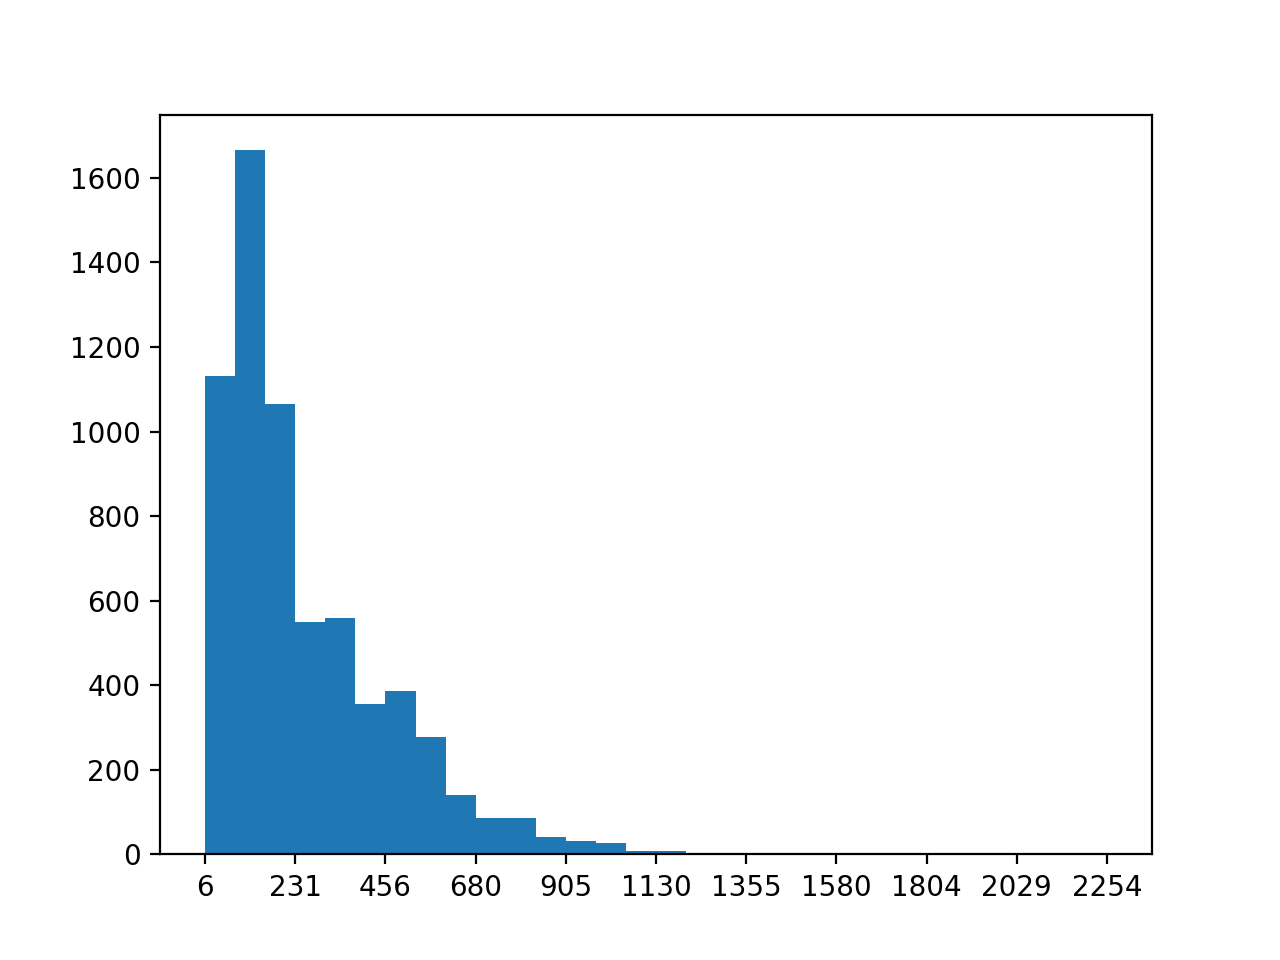

In [6]:
# Discrétisation des distances & histogramme a la main
# n = 30 # nb intervalle
# inter = ...
# bornes = ...

intervals_num = 30

d_range = np.linspace(d.min(), d.max(), intervals_num+1)
d_bounds = np.array([[d_current, d_next] for d_current, d_next in zip(d_range, d_range[1:])])
d_frequencies = np.logical_and(
    d_bounds[:, 0].reshape(intervals_num, 1) <= d * np.ones((d_bounds.shape[0], d.size)),
    d * np.ones((d_bounds.shape[0], d.size)) <= d_bounds[:, 1].reshape(intervals_num, 1)
).sum(axis=1)


# calcul des effectifs avec np.where
# effectifs = ...

bornes = d_range.copy()
effectifs = d_frequencies.copy()

# print(bornes,effectifs)

print((d_frequencies, d_bounds))

# affichage avec plt.bar = histogramme à la main

plt.bar(d_range[:d_range.size-1], d_frequencies, align='edge', width=(d_range[1]-d_range[0]))
plt.xticks(d_range[::3])
plt.show()


## histogramme (bis)
Tracer l'histogramme des prix au km

<IPython.core.display.Javascript object>


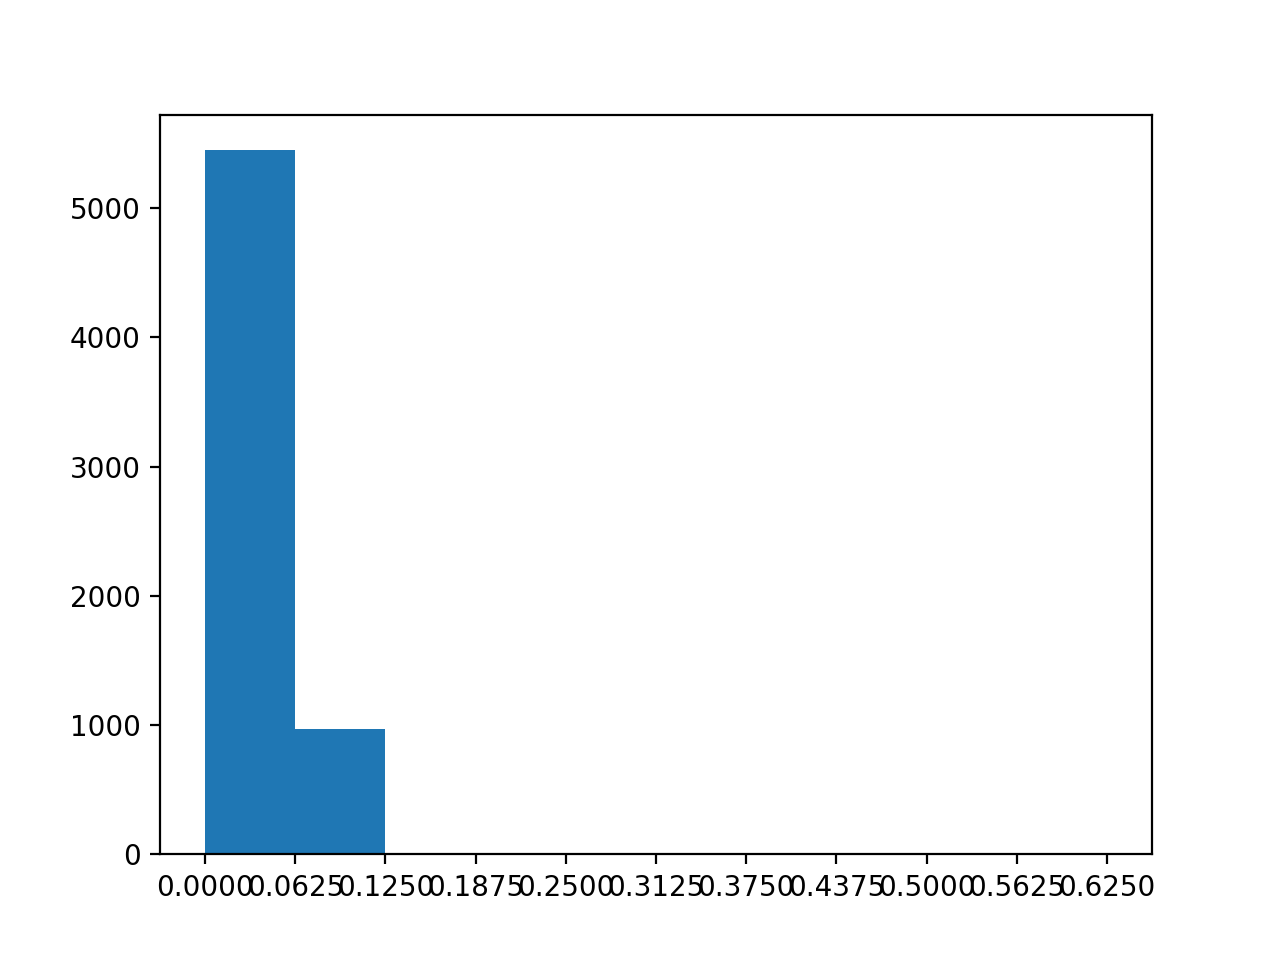

In [24]:
# histogramme des prix au km : construction de la variable puis utilisation de np.histogramme

price_index = -4
price_sample = data[:, price_index] / d
price_sample = np.sort(price_sample)

price_intervals_num = 10
price_hist = np.histogram(price_sample, price_intervals_num)
price_range = price_hist[1]
price_frequencies = price_hist[0]

plt.bar(price_range[:price_range.size-1], price_frequencies, align='edge', width=(price_range[1]-price_range[0]))
plt.xticks(price_range)
plt.show()

# Distributions jointes, distributions conditionnelles

Nous voulons maintenant étudier la distribution jointe entre la distance et la marque de la voiture. Partir des distributions discrètes ou discétisées et construire le tableau d'effectif puis normaliser par les effectifs de l'échantillon pour estimer la loi jointe.

Il est diffile d'analyser cette probabilité jointe (cf ci-dessous pour l'affichage)... Nous allons donc passer à la loi conditionnelle: nous voulons donc calculer la probabilité de la distance conditionnellement à la marque de la voiture.

1. Proposer un critère rapide pour vérifier que votre distribution conditionnelle respecte bien les propriétés de base
1. Cette distribution conditionnelle fait apparaitre des pics très marqués: pouvons-nous tirer parti de ces informations?

**Note:** 
- pour afficher une matrice `p_dm`, la meilleure solution est la suivante:
> `plt.imshow(p_dm, interpolation='nearest')`
>
> `plt.show()`
- la variable `marque` est bruitée. Vous pourrez vous amuser à éliminer ou fusionner certaines catégories
- les indices dans une matrice doivent toujours être entiers. `int(...)`
- pour ajouter une description sur l'axe des x:
```python
fig, ax = plt.subplots(1,1)
plt.imshow(p_dsm, interpolation='nearest')
ax.set_xticks(np.arange(len(dico_marques)))
ax.set_xticklabels(dico_marques.keys(),rotation=90,fontsize=8)
plt.show()
```
- Si l'image est trop petite pour voir quelque chose: solution = sauvegarde en pdf (ie vectorielle) + ouverture avec un logiciel de lecture pdf
```python
plt.savefig('mafigure.pdf')
```



6428


<IPython.core.display.Javascript object>


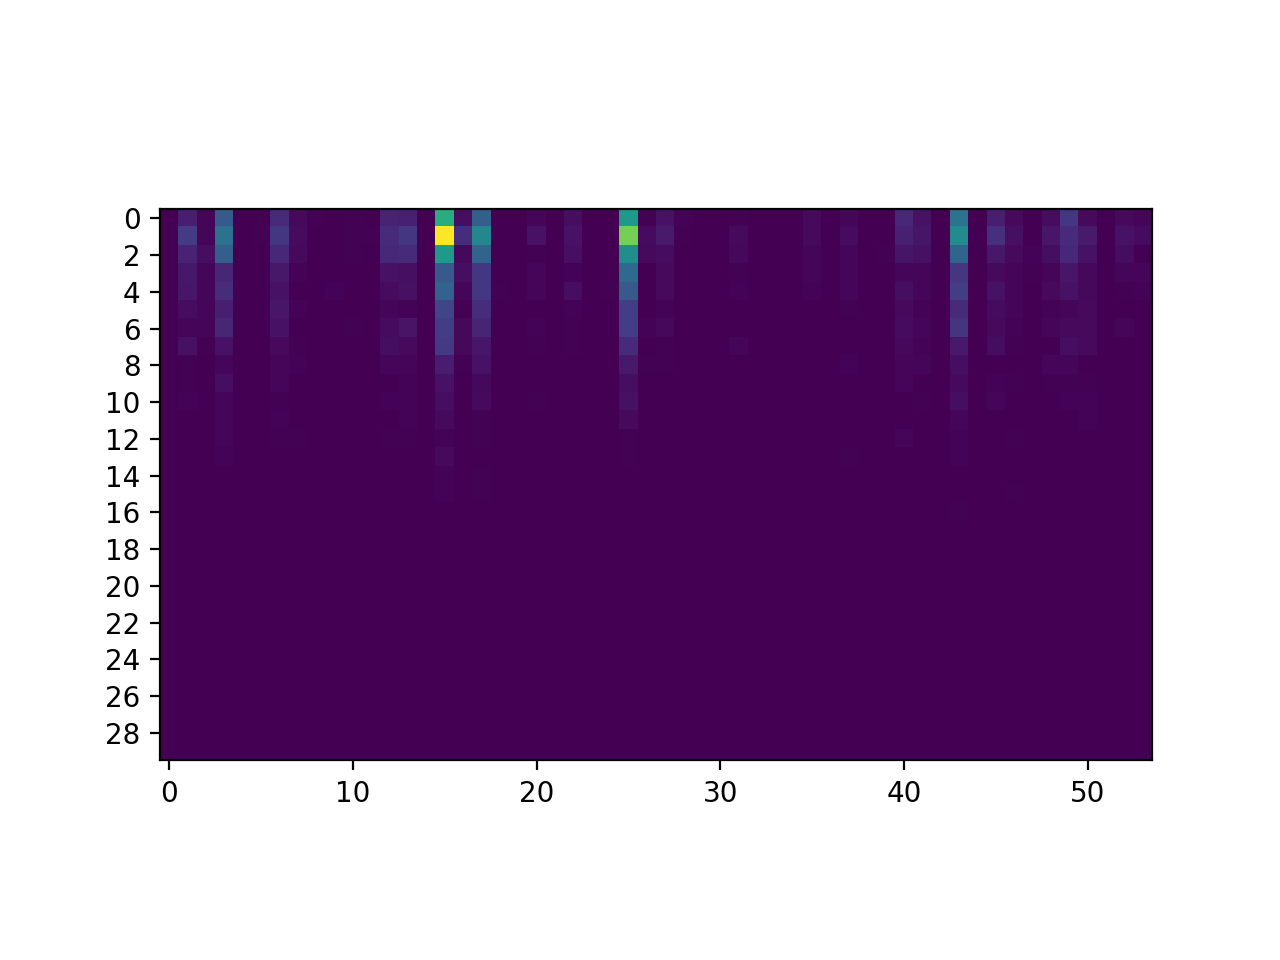

In [10]:
# loi jointe distance / marque

import numpy as np

# construction de la distance discrétisée 
# Dimensions : = (Nind x 1) = mêmes dimensions que d
# contenu = catégorie de distance (entre 0 et 29 par exemple si on a discrétisé en 30 catégories)

m = np.array(data[:, -3], dtype=int)

m_frequencies = np.unique(np.concatenate((m, np.arange(len(dico_marques.keys())))), return_counts=True)
m_frequencies = m_frequencies[1] - 1

d_discr = np.nonzero(np.logical_and(
    d_bounds[:, 0].reshape(intervals_num, 1) <= d * np.ones((d_bounds.shape[0], d.size)),
    d * np.ones((d_bounds.shape[0], d.size)) <= d_bounds[:, 1].reshape(intervals_num, 1)
))[0]

dm_frequencies = np.zeros((intervals_num, len(dico_marques.keys())), dtype=int)

for i, j in zip(range(len(d_discr)), range(len(m))):
    dm_frequencies[d_discr[i], m[j]] += 1
    
dm_distribution = dm_frequencies / dm_frequencies.sum()

# categories_num = 30
# dd = np.zeros(d.shape)

# # remplissage avec np.where

# p_dm = np.zeros((len(bornes)-1, len(dico_marques)))

# # remplissage de la matrice p_dm = double boucle + comptage

# p_dm /= p_dm.sum() # normalisation

# # affichage du résultat
plt.imshow(dm_distribution, interpolation='nearest')
plt.yticks(np.arange(intervals_num)[::2])
plt.show()
 

<IPython.core.display.Javascript object>


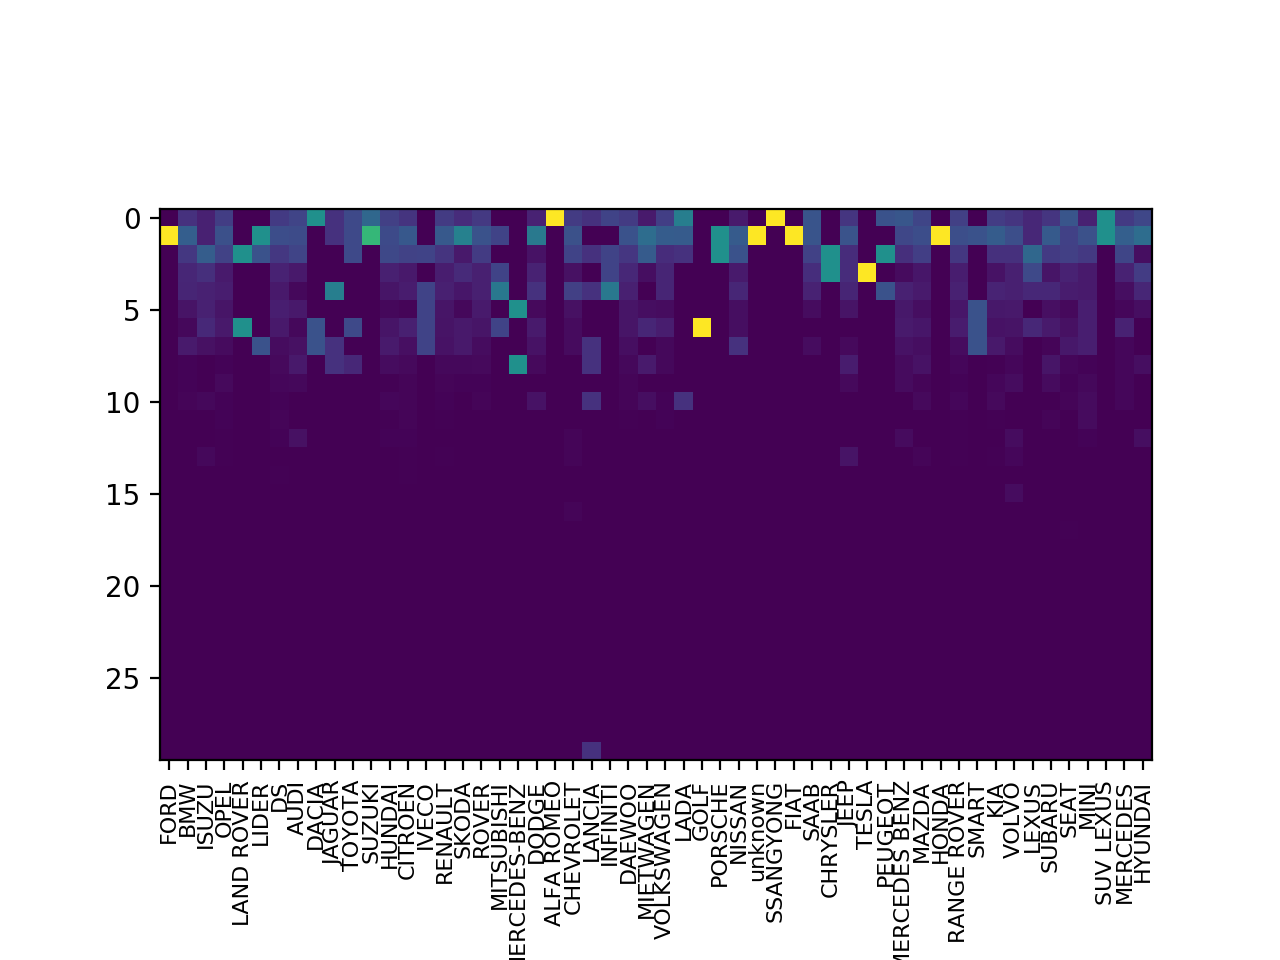

4.240381089939681e-17


In [11]:
# loi conditionnelle distance | marque
# calcul d'une marginale

p_m = dm_distribution.sum(axis=0)

# calcul de la conditionnelle
p_dsm = dm_distribution / p_m

# affichage
fig, ax = plt.subplots(1,1)
plt.imshow(p_dsm, interpolation='nearest')
ax.set_xticks(np.arange(len(dico_marques)))
ax.set_xticklabels(dico_marques.keys(),rotation=90,fontsize=8)
plt.show()

# proposition d'un critère très rapide pour vérifier qu'il s'agit bien d'une distribution conditionnelle
# vérifier si la distribution des distances et égal à la distribution qu'on obtiendra en utilisant la formule
# P(A) = SUM(P(A|B) * P(B))
d_distribution_err = np.linalg.norm(d_frequencies / d_frequencies.sum() - (p_dsm * p_m).sum(axis=1))
print(d_distribution_err)
# le résultat: 4.240381089939681e-17


## Tracé de l'ensemble de l'échantillon avec des codes couleurs

Nous proposons ensuite de tracer toutes les trajectoires des voitures blablacar. Pour cela, il faut utiliser la commande `plt.plot`.
Vous devez optenir des étoiles à partir des 7 villes requêtes: `['Paris', 'Marseille', 'Grenoble', 'Lille', 'Strasbourg', 'Nantes', 'Bordeaux']`.
Mais on ne voit pas grand chose... Et ça prend beaucoup de temps à tracer avec une boucle for. On propose donc une série d'exercice pour mieux comprendre ce qui se passe.
1. Attention à l'ordre des arguments dans le plot:
```plt.plot(tous_les_x, tous_les_y)```
Afin de tracer des trajectoires, il faut envoyer les x et les y 2 par 2 dans une boucle `for`
1. Pour éviter les boucles, il existe une méthode `quiver` dédiée au tracé de champs de vecteurs: ça ira beaucoup plus vite qu'avec plot. Il faut juste bien comprendre les mécanismes d'échelles. Pour utiliser l'échelle 1, la commande est la suivante:
```python
plt.quiver(x_dep, y_dep, delta_x, delta_y,\
            angles='xy', scale_units='xy', scale=1)
```
1. Isoler les trajets proposés à partir de chacune des villes sachant les coordonnées sont:
```python
coord = np.array([[45.18721767,  5.72345183],
 [47.22572172, -1.56558993],
 [50.63010695,  3.07071992],
 [48.5782548,   7.74078742],
 [44.83848889, -0.58156509],
 [43.2991509,   5.38925024],
 [48.8477201,   2.34607889]])
```
Chaque trajectoire (point de départ) sera rattachée à la ville la plus proche.
Une fois la distance calculée pour chaque origine de trajectoire, vous pourrez avoir besoin de `argmin`
1. Tracer les trajets d'une couleur spéciale en fonction des origines. 

Les commandes matplotlib attendent des instructions de couleur au format RGB ou avec des lettres. Je vous propose une solution élégante pour distinguer les villes.
 - soit l'index de la ville la plus proche sotcké dans `ville_or` (0,...,7)
 - construire le dictionnaire: `dict({0:'b', 1:'r', 2:'k', 3:'y', 4:'c', 5:'m', 6:'g'})`
 - transformer `ville_or` en `ville_c` en vectorisant l'appel à la table de hash:
```python
ville_c = np.vectorize(dico.get)(ville_or)
```

In [ ]:
# tracé de l'ensemble des trajectoires avec un code couleur en fonction de la ville de départ


[[0.         7.56872701 6.05491786 3.94572879 6.3146536  1.91741671
  4.98055479]
 [7.56872701 0.         5.75197425 9.40414829 2.58208936 7.986724
  4.23462297]
 [6.05491786 5.75197425 0.         5.1009438  6.84704502 7.68885554
  1.92406016]
 [3.94572879 9.40414829 5.1009438  0.         9.12400134 5.77915782
  5.40143422]
 [6.3146536  2.58208936 6.84704502 9.12400134 0.         6.16605199
  4.96437651]
 [1.91741671 7.986724   7.68885554 5.77915782 6.16605199 0.
  6.32831036]
 [4.98055479 4.23462297 1.92406016 5.40143422 4.96437651 6.32831036
  0.        ]]
[5 4 6 0 1 0 2]
['m' 'c' 'g' 'b' 'r' 'b' 'k']


<IPython.core.display.Javascript object>


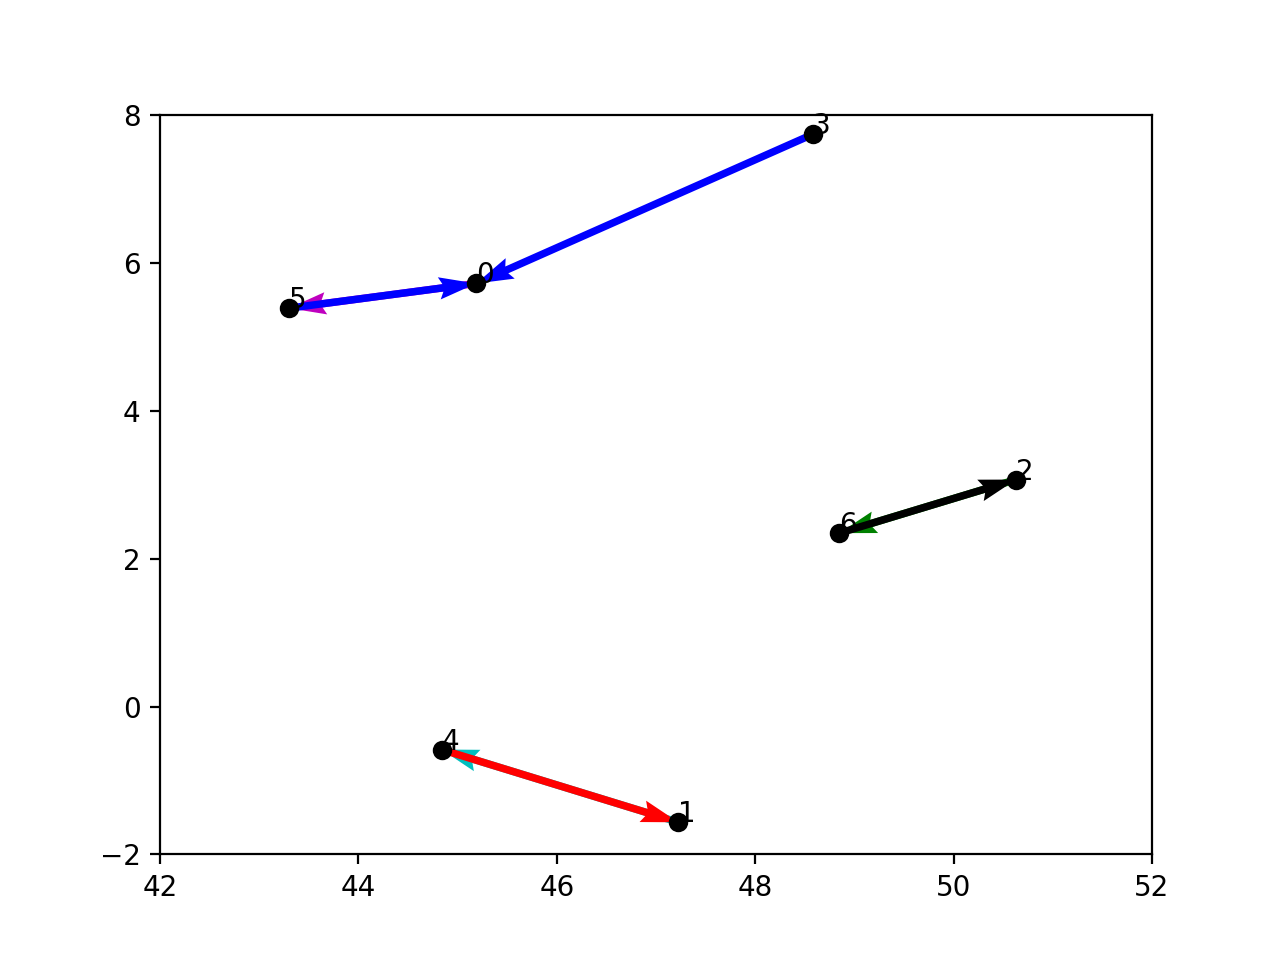

In [22]:
# trouver l'information sur la ville la plus proche

coord = np.array([[45.18721767,  5.72345183],
 [47.22572172, -1.56558993],
 [50.63010695,  3.07071992],
 [48.5782548,   7.74078742],
 [44.83848889, -0.58156509],
 [43.2991509,   5.38925024],
 [48.8477201,   2.34607889]])

x_min, x_max, y_min, y_max = 42, 52, -2, 8

# calcul de la matrice de distance
dist = np.sqrt(
    np.sum(
        (coord * np.ones((coord.shape[0], coord.shape[0], coord.shape[1])) -
         np.transpose(coord * np.ones((coord.shape[0], coord.shape[0], coord.shape[1])), axes=[1, 0, 2])) ** 2,
        axis=2
    )
)
dist_corrected = np.where(dist > 0, dist, np.inf)
print(dist)
# indice de la ville d'origine du trajet (plus petite distance dans le tableau ci-dessus)
ville_or = dist_corrected.argmin(axis=1)
print(ville_or)

# astuce pour construire une correspondance indice => code couleur
dico = dict({0:'b', 1:'r', 2:'k', 3:'y', 4:'c', 5:'m', 6:'g'})
ville_c = np.vectorize(dico.get)(ville_or)
print(ville_c)

plt.figure()
plt.quiver(coord[:, 0], coord[:, 1], coord[ville_or][:, 0] - coord[:, 0], coord[ville_or][:, 1] - coord[:, 1],
           color= ville_c,  angles='xy', scale_units='xy', scale=1)
plt.plot(coord[:, 0], coord[:, 1], 'ko')
for p in range(coord.shape[0]):
    plt.text(coord[p, 0], coord[p, 1], '%i' % p)
plt.axis([x_min, x_max, y_min, y_max])
plt.show()

## Etude de la corrélation entre variables

On propose d'étudier la corrélation entre la distance du trajet et le nombre d'étoiles de confort. Attention, les étoiles ne sont pas toujours renseignées (-1 = inconnu). On fera aussi ces opérations entre la distance et le prix.

1. Tracer dans le plan les coordonnées (distance,etoile) pour les points concernés

Vous utiliserez la commande `scatter` pour réaliser l'opération
1. Calculer le coefficient de corrélation entre les deux variables aléatoires


<IPython.core.display.Javascript object>


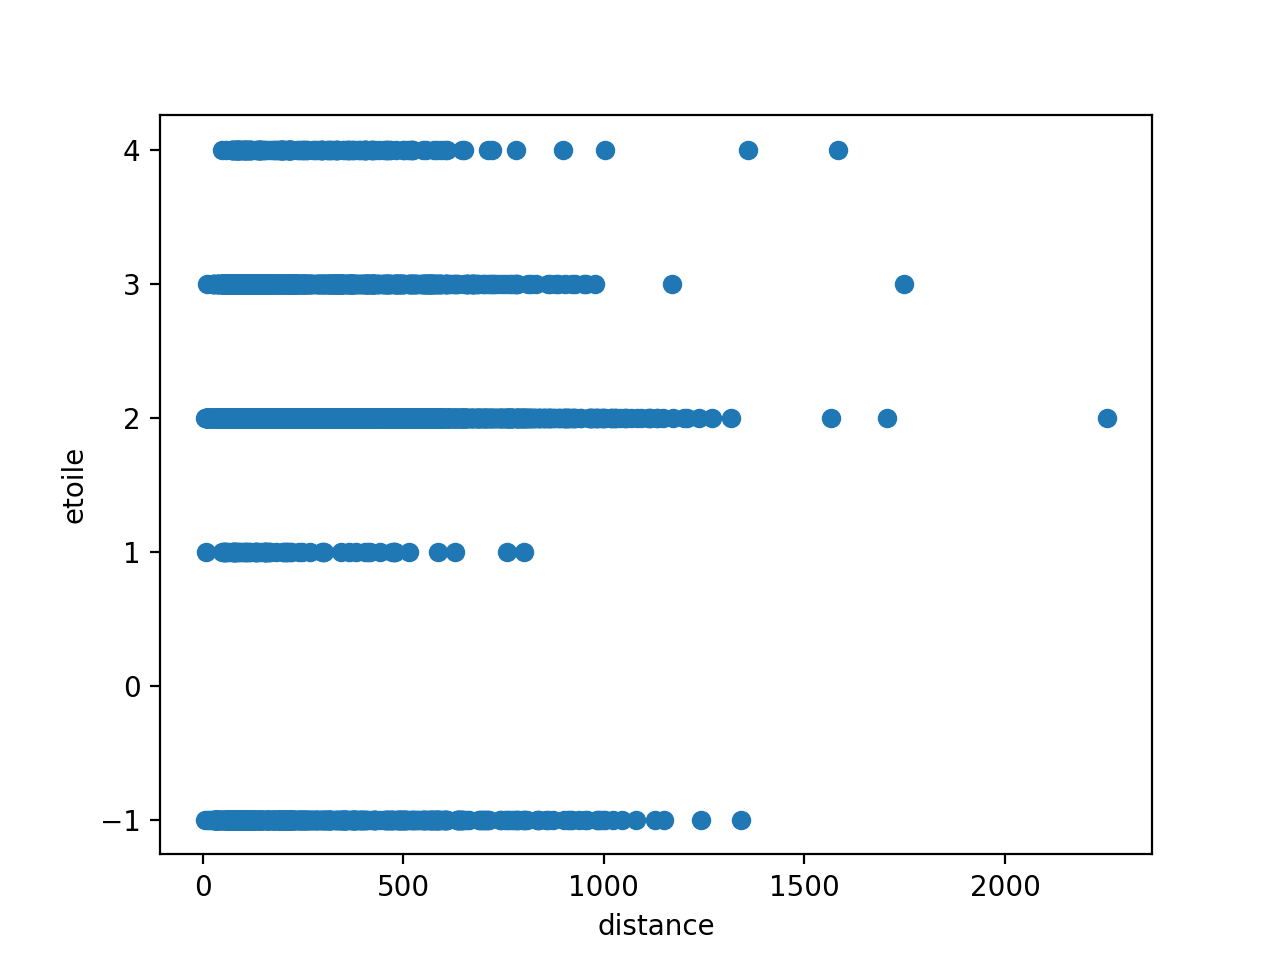

0.04876702920117653


<IPython.core.display.Javascript object>


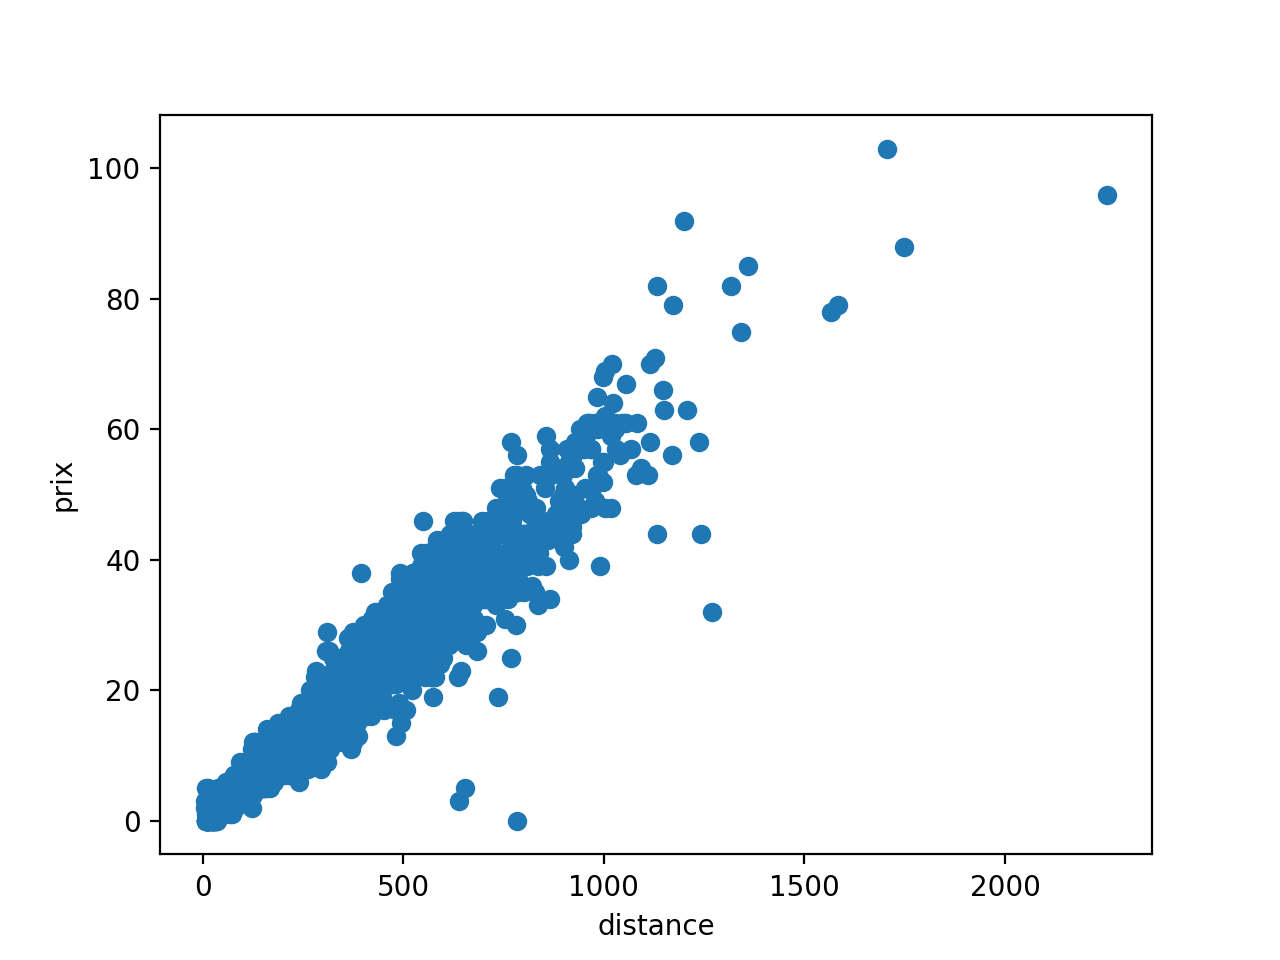

0.9728618796588482


In [25]:
stars_index = -2
s = data[:, stars_index]

# test de corrélation entre la distance et le confort de la voiture
plt.figure()
plt.scatter(d, s)
plt.xlabel('distance')
plt.ylabel('etoile')
# affichage du nuage de points correspondant au deux variables
plt.show()

# calcul du coefficient de corrélation pour tous les points admissibles 
# (ceux pour lesquels les étoiles sont renseignées)
inds = s >= 0
coef_corr_d_s = (np.mean(d[inds] * s[inds]) - np.mean(d[inds]) * np.mean(s[inds])) / np.std(d[inds]) / np.std(s[inds])
print(coef_corr_d_s)

price_index = -4
price = data[:, price_index]
# test de corrélation entre la distance et le prix
plt.figure()
plt.scatter(d, price)
plt.xlabel('distance')
plt.ylabel('prix')
# affichage du nuage de points correspondant au deux variables
plt.show()

# calcul du coefficient de corrélation pour tous les points admissibles 
coeff_corr_d_price = (np.mean(d * price) - np.mean(d) * np.mean(price)) / np.std(d) / np.std(price)
print(coeff_corr_d_price)

## Quelques questions supplémentaires

### prix au kilomètre en fonction de l'origine
On s'intérroge sur le prix des courses en fonction des villes de départ. On ne veut pas tomber dans des pièges liés à des résumés simplistes, nous allons donc calculer la distribution jointe (prix_km, ville_origine).
1. Mettre au propre le code de discretisation en construisant une méthode de signature:
```python
def discretisation(x, nintervalles):
    #[...]
    return bornes, effectifs, xd 
```
1. Mettre au propre le code de calcul de la loi jointe entre deux échantillons de variables aléatoires discrètes
```python
def pjointe(xd, yd):
    #[...]
    return pj
```
1. En l'état, nous avons du mal à analyser les données. Ceci est du aux valeurs extrêmes (notamment hautes). Afin de rendre l'analyse robuste, seuiller le prix au km au 99ème percentile (toutes les valeurs supérieures sont ramenées à cette valeur limite).
1. Proposer quelques analyses.

### même analyse pour voir dans quelle ville les gens sont plus matinaux, s'ils partent plus vers le sud ou le nord, l'est ou l'ouest...

Si vous étiez un journaliste en manque de sujet de reportage, quel(s) graphique(s) calculeriez vous à partir de ces données? 


In [37]:
def discretisation(x, nintervalles, eps = 0.0000001) :
    bornes = np.linspace(x.min(), x.max(), nintervalles+1)
    intervalles = np.array([[x_cour, x_suiv] for x_cour, x_suiv in zip(bornes, bornes[1:])])
    effectifs = np.logical_and(
        intervalles[:, 0].reshape(nintervalles, 1) <= x * np.ones((intervalles.shape[0], x.size)),
        x * np.ones((intervalles.shape[0], x.size)) <= intervalles[:, 1].reshape(nintervalles, 1)
    ).sum(axis=1)
    xd = np.nonzero(np.logical_and(
        intervalles[:, 0].reshape(nintervalles, 1) <= x * np.ones((intervalles.shape[0], x.size)),
        x * np.ones((intervalles.shape[0], x.size)) <= intervalles[:, 1].reshape(nintervalles, 1)
    ))[0]
    return bornes, effectifs, xd

def pjointe(xd, yd): # variable codées de 0 à valmax
    pj = np.zeros((yd.size, xd.size), dtype=int)
    for i, j in zip(range(yd.size), range(xd.size)):
        pj[yd[i], xd[j]] += 1
    return pj / pj.sum()

[0. 1.]


<IPython.core.display.Javascript object>


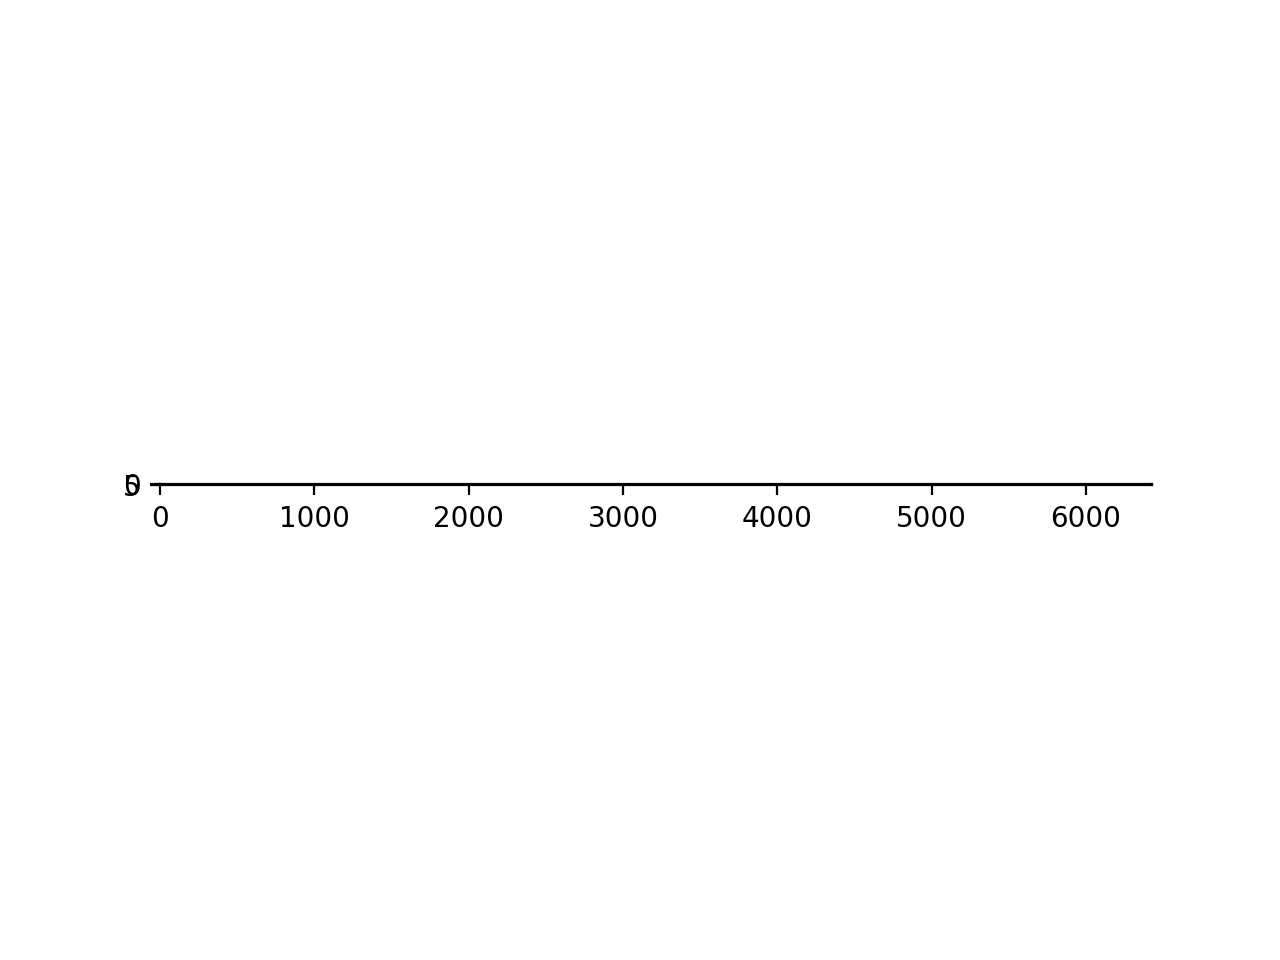

In [54]:
# prix km
pkm = data[:,-4]/data[:,-1]
n = 30 # nb catégories

# robustesse : calcul du 99è percentile et seuillage des valeurs
percentile_99_pkm = np.percentile(pkm, 99)
pkm = np.where(pkm <= percentile_99_pkm, pkm, percentile_99_pkm)

bornes, effectifs, pkmd = discretisation(pkm, n)

pj = pjointe(pkmd,ville_or)

pv = pj.sum(axis=1)     # calcul de la marginale
p_km_s_v = pj / np.where(pv.reshape(pv.size, 1) != 0, pv.reshape(pv.size, 1), np.inf)


fig, ax = plt.subplots(1,1)
plt.imshow(p_km_s_v, interpolation='nearest')
plt.show()

# analyses